# Data Science Project - Group 8
##### Group 8: An Junyu, Brigitta Karen Tsai, Kruti Chandrashekar, Li Zongzheng, Yang yayong, Zhang xuanye
# Enhancing US Airline Passenger Satisfaction

# 1. Business Question 
##### How to increase airline profitability by analyzing customer satisfaction levels on the airline services

### Problem Analysis

# 2. Data Preparation and Exploration

**Data Overview**

The dataset contains feature related to airline passengers, including demographic details, flight information, and ratings on various aspects of their travel experience. The target variable is passenger satisfaction.

Import Python Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn
import seaborn as sns
import warnings # for hiding warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder # to encode categorical columns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree # for decision tree modelling 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Both **train** dataset and **test** dataset will be cleaned. The **test** dataset is used to test the model for **Decision Tree Modelling**

### 2.1 Train Data Preparation

Load **train** dataset and check the size of dataset

In [51]:
df = pd.read_csv('train.csv')
df.shape

(103904, 25)

Check the first 10 rows of the data

In [52]:
df.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


1. Check columns with **null** values.

In [53]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

There are 310 missing data in the column **Arrival Delay in Minutes**.

2. Check if there is any **duplicated rows**

In [54]:
print(f"Duplicated rows: {df.duplicated().sum()}")

Duplicated rows: 0


3. **Drop** unnecessary columns

The columns 'unnamed: 0' and id seems to be some identifier or index column. Hence, it is unnecessary for the analysis. 
Drop the columns using the following code.

In [55]:
df_cleaned=df.drop(['Unnamed: 0','id'], axis=1)
df_cleaned.head(2)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied


In [56]:
df_cleaned.shape

(103904, 23)

The result table now has 23 columns, 2 unnecessary columns are removed. 

4. Check for **highly correlated** columns

Take a look at the **correlation matrix** below

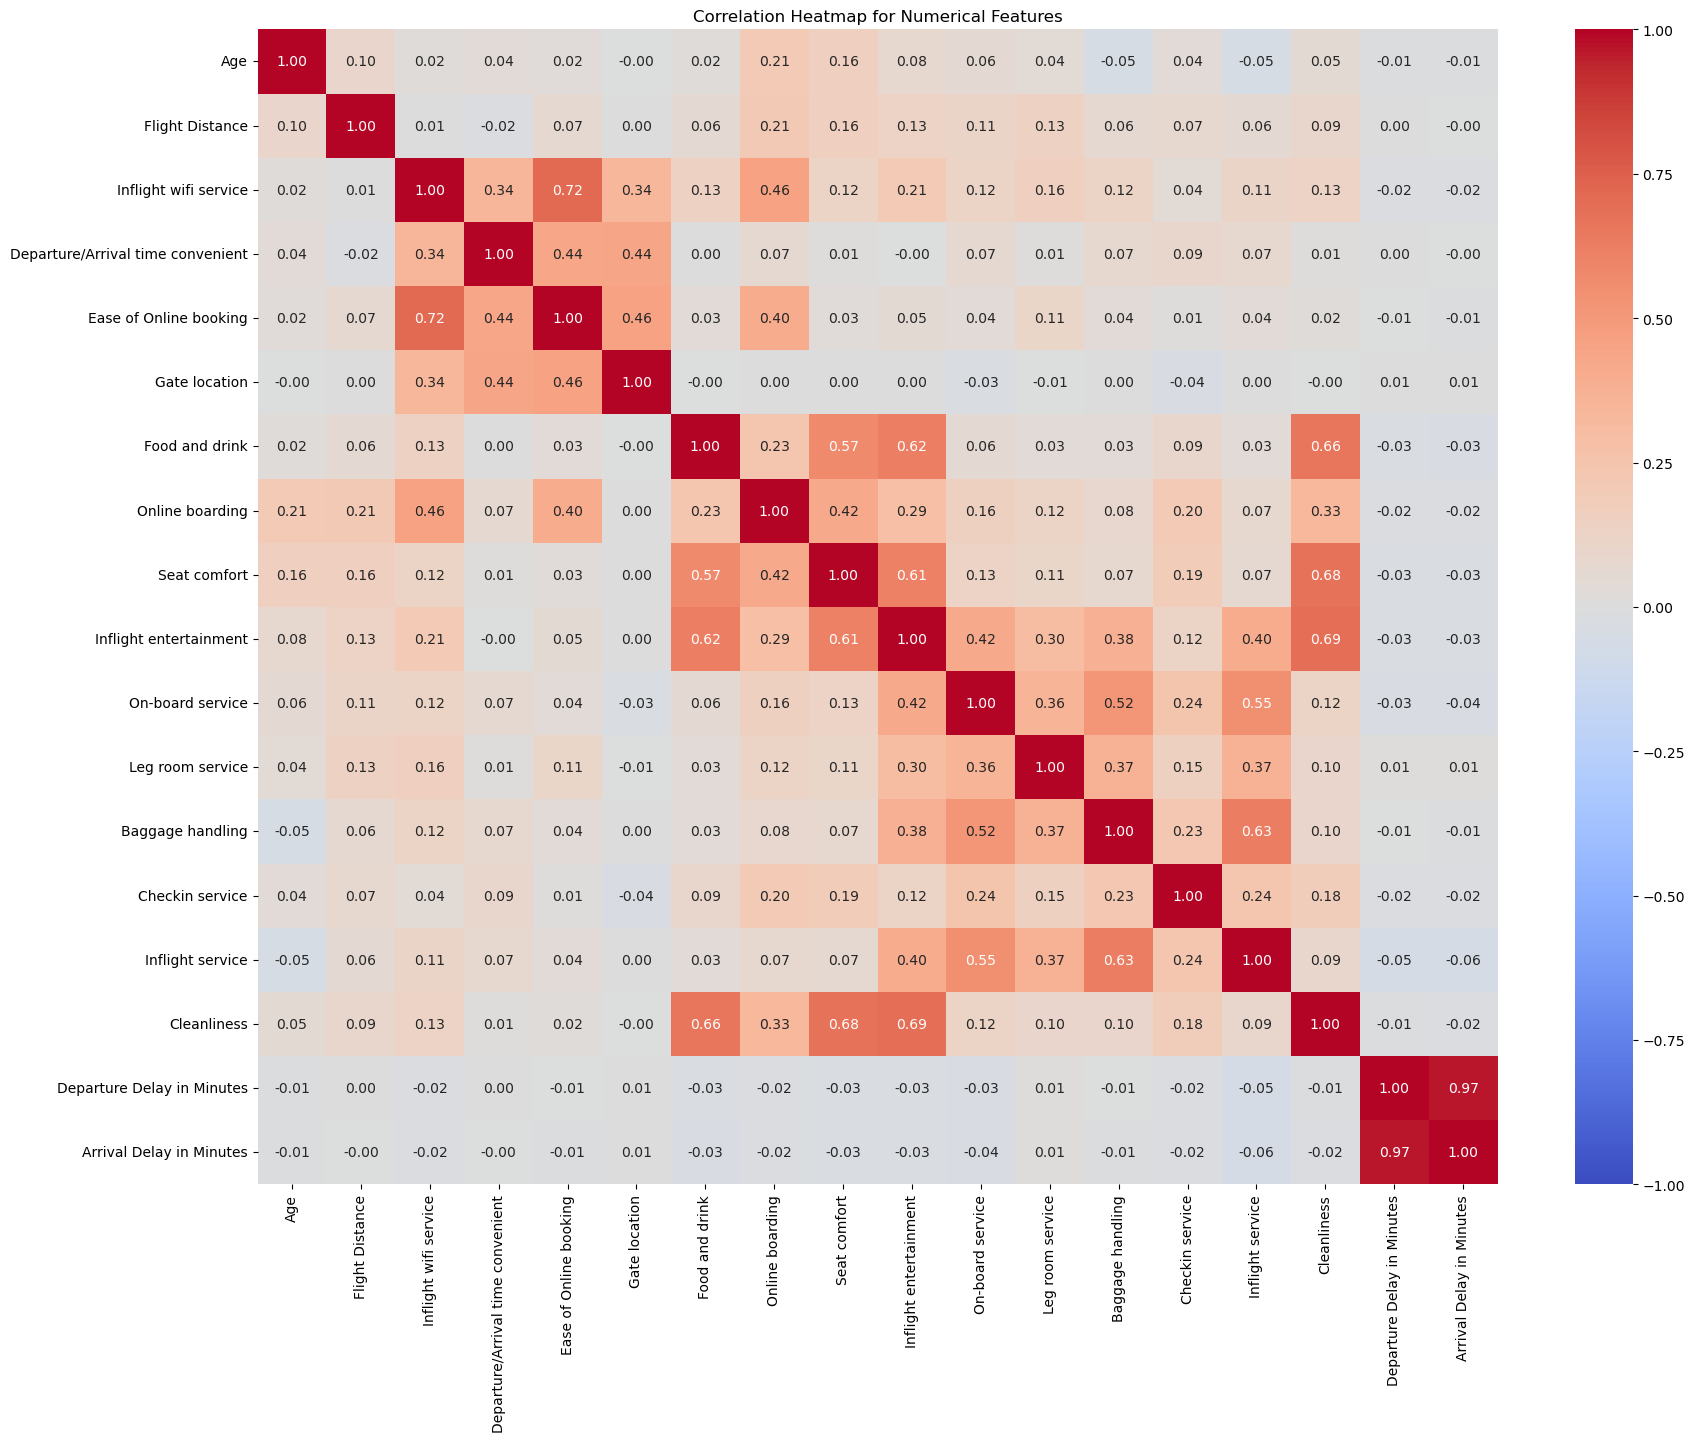

In [57]:
numeric_features = df_cleaned.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_features.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

In [58]:
corr_value = corr_matrix.loc['Departure Delay in Minutes', 'Arrival Delay in Minutes']
print(f"Correlation between Departure Delay in Minutes and Arrival Delay in Minutes: {corr_value:.3f}")

Correlation between Departure Delay in Minutes and Arrival Delay in Minutes: 0.965


Both columns are highly correlated, therefore we will drop the **Arrival Delay in Minutes** column since it has a lot of missing values. 

In [59]:
df_cleaned = df_cleaned.drop('Arrival Delay in Minutes', axis=1)

5. **Encode** categorical columns

Let's check the categorical columns in the **train** dataset

In [60]:
categorical_columns=[]
for col in df_cleaned.columns:
    if df_cleaned[col].dtype=='object':
        categorical_columns.append(col)
        print(f"Unique values of '{col}' is {df_cleaned[col].unique()}")

Unique values of 'Gender' is ['Male' 'Female']
Unique values of 'Customer Type' is ['Loyal Customer' 'disloyal Customer']
Unique values of 'Type of Travel' is ['Personal Travel' 'Business travel']
Unique values of 'Class' is ['Eco Plus' 'Business' 'Eco']
Unique values of 'satisfaction' is ['neutral or dissatisfied' 'satisfied']


In [61]:
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df_cleaned[f"{col}_label"] = label_encoders[col].fit_transform(df[col])

Check the new encoded categorical columns

In [62]:
for col in categorical_columns:
    df_group = df_cleaned[[col, f"{col}_label"]].drop_duplicates()
    print(df_group)
    print()

   Gender  Gender_label
0    Male             1
2  Female             0

       Customer Type  Customer Type_label
0     Loyal Customer                    0
1  disloyal Customer                    1

    Type of Travel  Type of Travel_label
0  Personal Travel                     1
1  Business travel                     0

      Class  Class_label
0  Eco Plus            2
1  Business            0
5       Eco            1

              satisfaction  satisfaction_label
0  neutral or dissatisfied                   0
2                satisfied                   1



6. **Replace** original columns with encoded columns

For easier read, let's replace the original categorical column with the labeled ones.

In [63]:
df_cleaned.drop(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], axis=1, inplace=True)
df_cleaned.rename(columns = {'Gender_label':'Gender', 'Customer Type_label':'Customer Type', 'Type of Travel_label':'Type of Travel'
                                     ,'Class_label':'Class', 'satisfaction_label':'satisfaction'}, inplace = True)

### Cleaned Train Dataset

In [64]:
df_cleaned

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Gender,Customer Type,Type of Travel,Class,satisfaction
0,13,460,3,4,3,1,5,3,5,5,...,4,4,5,5,25,1,0,1,2,0
1,25,235,3,2,3,3,1,3,1,1,...,3,1,4,1,1,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,4,5,0,0,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,...,3,1,4,2,11,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,4,3,3,3,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,3,2,2,2,2,...,4,2,3,2,3,0,1,0,1,0
103900,49,2347,4,4,4,4,2,4,5,5,...,5,5,5,4,0,1,0,0,0,1
103901,30,1995,1,1,1,3,4,1,5,4,...,4,5,5,4,7,1,1,0,0,0
103902,22,1000,1,1,1,5,1,1,1,1,...,1,5,4,1,0,0,1,0,1,0


### 2.2 Train Data Exploration

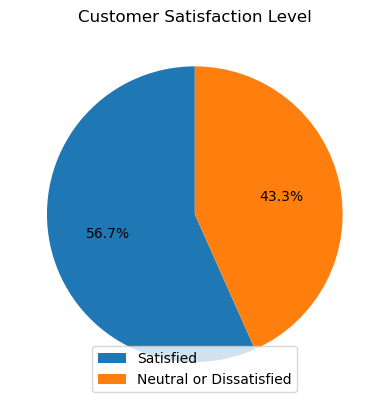

In [65]:
satisfaction_lvl=df_cleaned['satisfaction'].value_counts()

labels = ['Satisfied', 'Neutral or Dissatisfied']

plt.pie(satisfaction_lvl, autopct='%1.1f%%', startangle=90)
plt.title('Customer Satisfaction Level')
plt.legend(labels, loc='lower center')
plt.show()

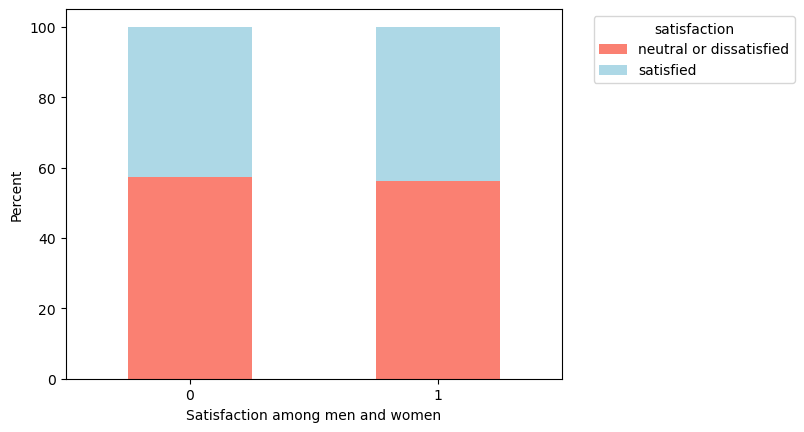

In [66]:
# Group data by gender and satisfaction
grouped_data = df_cleaned.groupby(['Gender', 'satisfaction']).size().unstack(fill_value=0)

# Calculate percentages
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plot the data
ax = grouped_data_percentage.plot(kind='bar', stacked=True, color=['salmon', 'lightblue'])


# Add title and labels
plt.xlabel('Satisfaction among men and women')
plt.ylabel('Percent')
plt.xticks(rotation=0)

# Show the legend and plot
plt.legend(['neutral or dissatisfied', 'satisfied'], title='satisfaction',bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

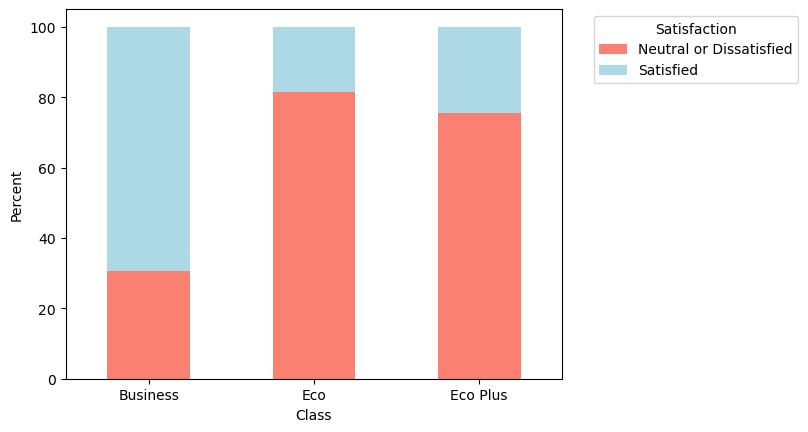

In [67]:
class_map = {0: 'Business', 1: 'Eco', 2: 'Eco Plus'}
df_cleaned['Class'] = df_cleaned['Class'].map(class_map)

# Group data by customer type and satisfaction
grouped_data = df_cleaned.groupby(['Class', 'satisfaction']).size().unstack(fill_value=0)

# Calculate percentages
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plot the data
ax = grouped_data_percentage.plot(kind='bar', stacked=True, color=['salmon', 'lightblue'])

# Add title and labels
plt.xlabel('Class')
plt.ylabel('Percent')
plt.xticks(rotation=0)
# Show the legend and plot
plt.legend(['Neutral or Dissatisfied', 'Satisfied'], title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

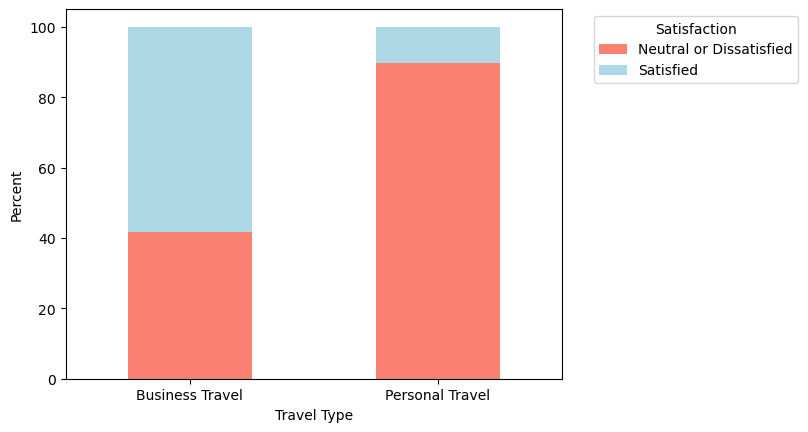

In [68]:
traveltype_map = {0: 'Business Travel', 1: 'Personal Travel'}
df_cleaned['Type of Travel'] = df_cleaned['Type of Travel'].map(traveltype_map)
# Group data by travel type and satisfaction
grouped_data = df_cleaned.groupby(['Type of Travel', 'satisfaction']).size().unstack(fill_value=0)

# Calculate percentages
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plot the data
ax = grouped_data_percentage.plot(kind='bar', stacked=True, color=['salmon', 'lightblue'])

# Add title and labels
plt.xlabel('Travel Type')
plt.ylabel('Percent')
plt.xticks(rotation=0)
# Show the legend and plot
plt.legend(['Neutral or Dissatisfied', 'Satisfied'], title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

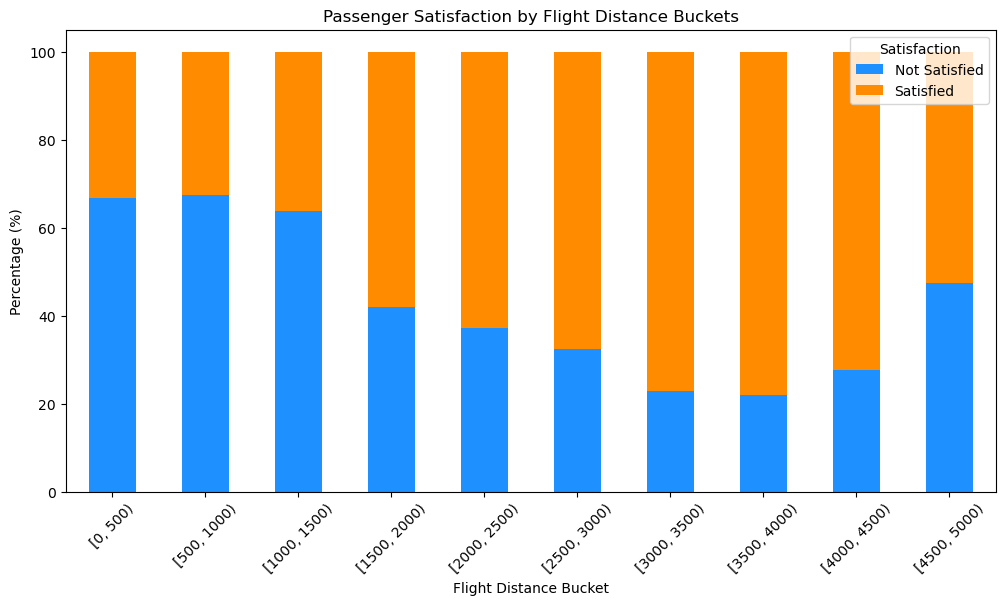

In [69]:
# Assume 'Flight Distance' is a continuous numeric column
# Divide flight distance into buckets, one bucket every 500 kilometers
df_cleaned['Distance Bucket'] = pd.cut(df_cleaned['Flight Distance'], bins=np.arange(0, 5500, 500), right=False)

# Recalculate the satisfaction percentage of each bucket
grouped_data = df_cleaned.groupby(['Distance Bucket', 'satisfaction']).size().unstack(fill_value=0)
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Draw a new stacked column chart
ax = grouped_data_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), color=['dodgerblue', 'darkorange'])
plt.title('Passenger Satisfaction by Flight Distance Buckets')
plt.xlabel('Flight Distance Bucket')
plt.ylabel('Percentage (%)')
plt.legend(title='Satisfaction', labels=['Not Satisfied', 'Satisfied'])
plt.xticks(rotation=45)
plt.show()
# remove??

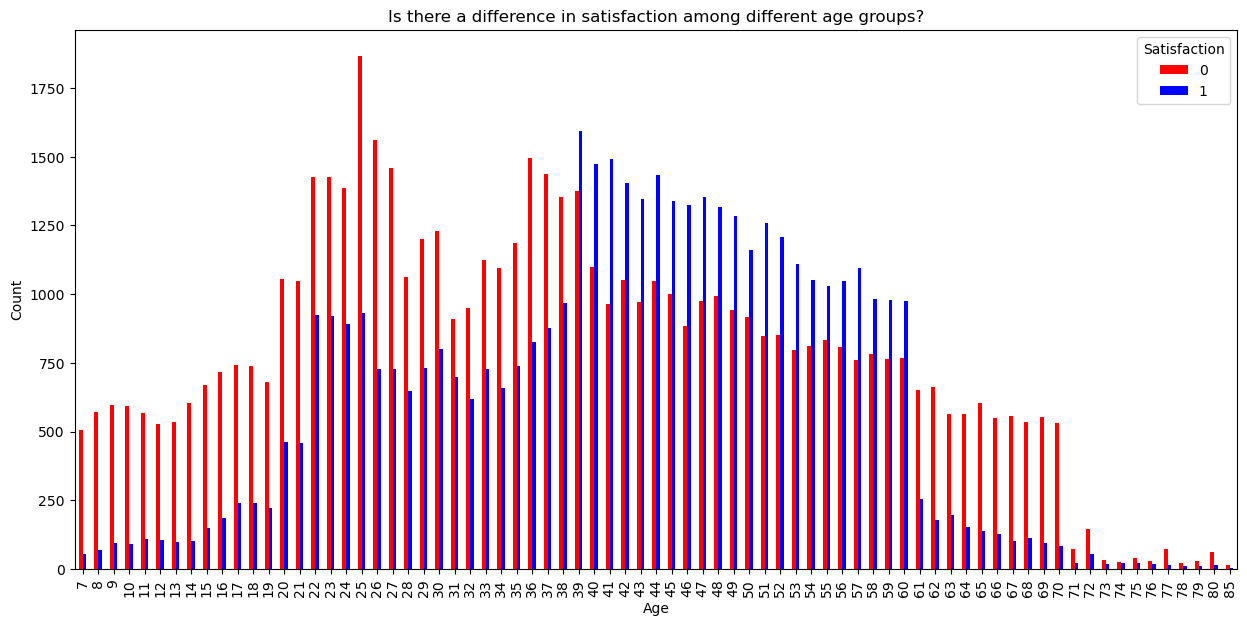

In [70]:
# Calculate the number of satisfied and dissatisfied in each age group
age_satisfaction_counts = df_cleaned.groupby(['Age', 'satisfaction']).size().unstack(fill_value=0)

# Draw stacked bar chart
ax = age_satisfaction_counts.plot(kind='bar', stacked=False, color=['red', 'blue'], figsize=(15, 7))

# Add title and tags
plt.title('Is there a difference in satisfaction among different age groups?')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Satisfaction')
plt.show()

# remove??

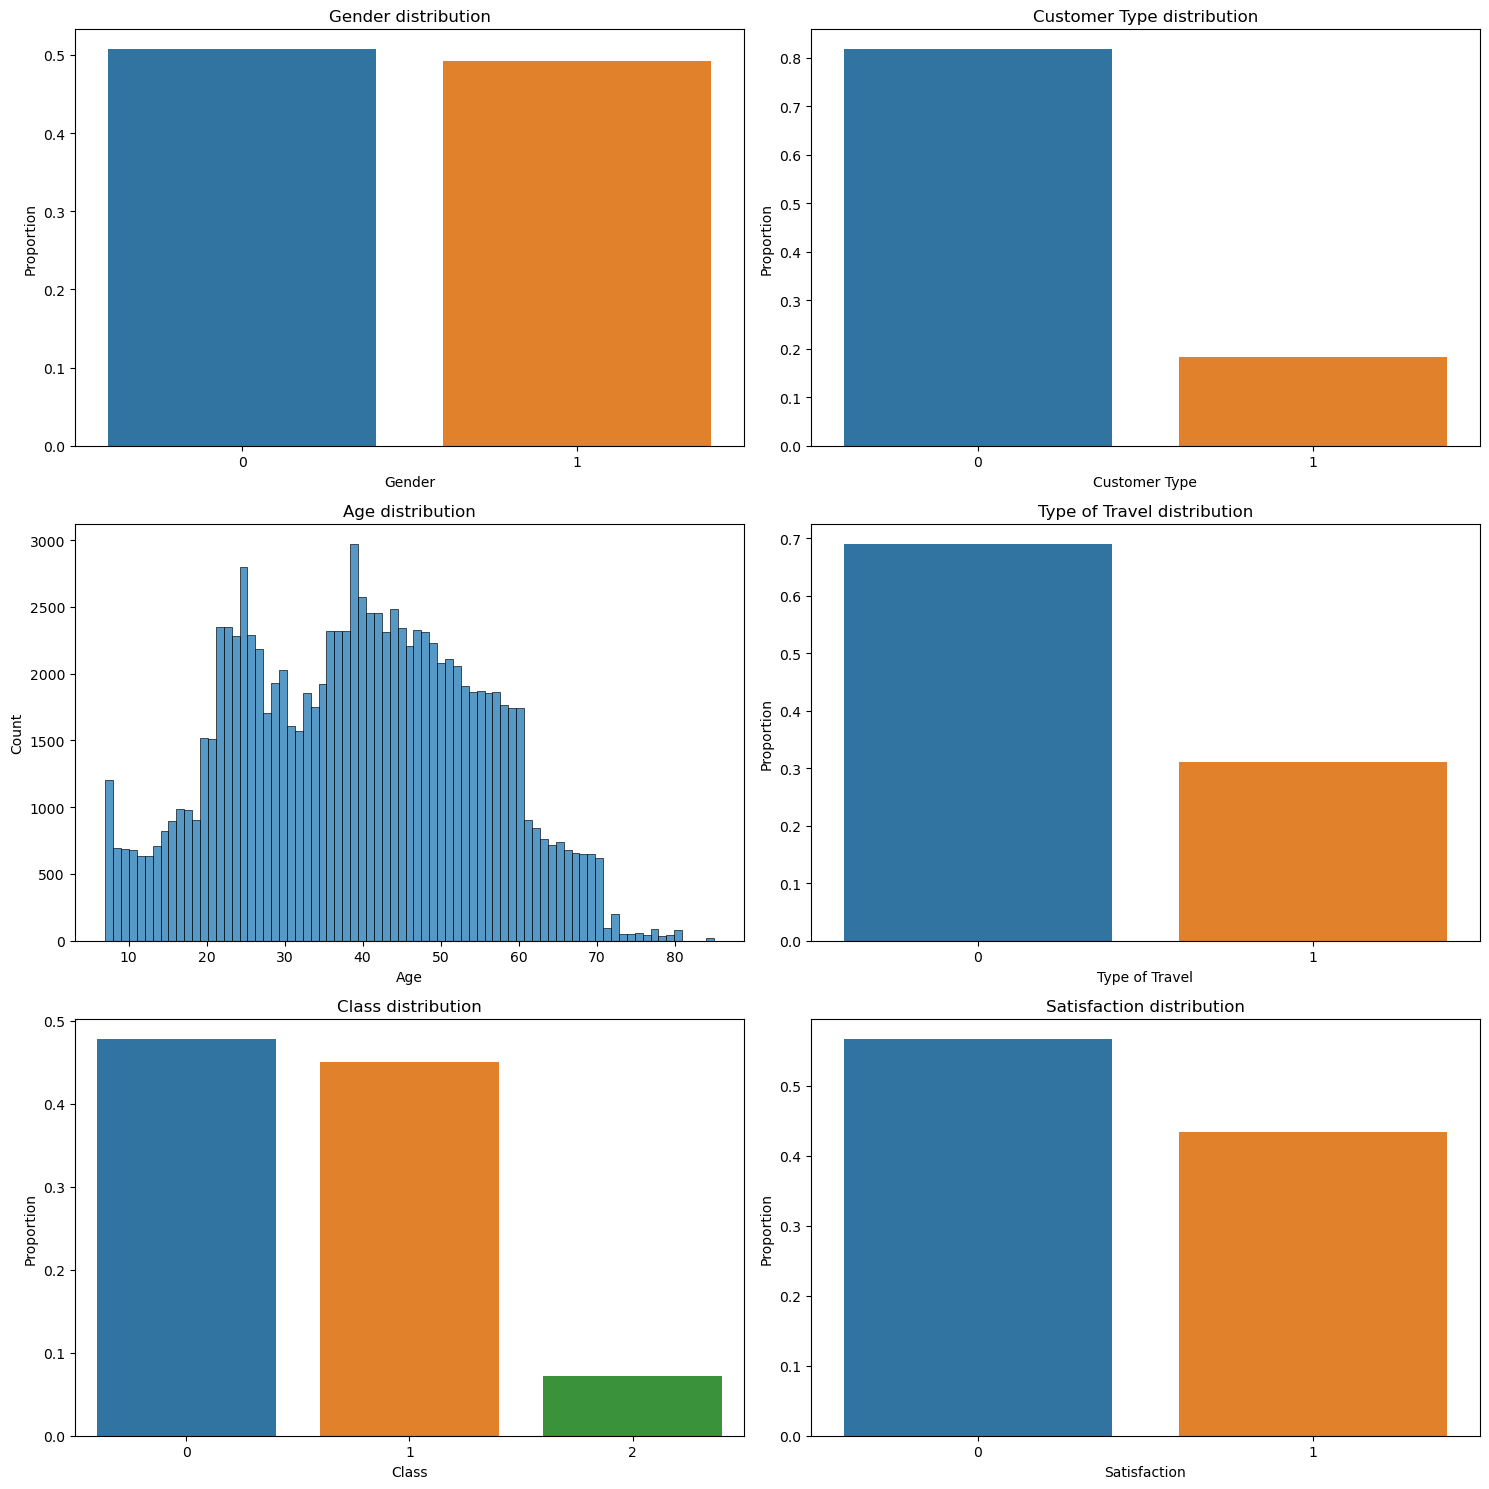

In [88]:
gender_count = df_cleaned['Gender'].value_counts(normalize=True)
customer_type_count = df_cleaned['Customer Type'].value_counts(normalize=True)
type_of_travel_count = df_cleaned['Type of Travel'].value_counts(normalize=True)
class_count = df_cleaned['Class'].value_counts(normalize=True)
satisfaction_count = df_cleaned['satisfaction'].value_counts(normalize=True)
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

sns.barplot(x=gender_count.index, y=gender_count.values, ax=axs[0, 0])
axs[0, 0].set_title('Gender distribution')
axs[0, 0].set_xlabel('Gender')
axs[0, 0].set_ylabel('Proportion')

sns.barplot(x=customer_type_count.index, y=customer_type_count.values, ax=axs[0, 1])
axs[0, 1].set_title('Customer Type distribution')
axs[0, 1].set_xlabel('Customer Type')
axs[0, 1].set_ylabel('Proportion')

sns.histplot(df_cleaned['Age'], kde=False, ax=axs[1, 0])
axs[1, 0].set_title('Age distribution')
axs[1, 0].set_xlabel('Age')
axs[1, 0].set_ylabel('Count')

sns.barplot(x=type_of_travel_count.index, y=type_of_travel_count.values, ax=axs[1, 1])
axs[1, 1].set_title('Type of Travel distribution')
axs[1, 1].set_xlabel('Type of Travel')
axs[1, 1].set_ylabel('Proportion')

sns.barplot(x=class_count.index, y=class_count.values, ax=axs[2, 0])
axs[2, 0].set_title('Class distribution')
axs[2, 0].set_xlabel('Class')
axs[2, 0].set_ylabel('Proportion')

sns.barplot(x=satisfaction_count.index, y=satisfaction_count.values, ax=axs[2, 1])
axs[2, 1].set_title('Satisfaction distribution')
axs[2, 1].set_xlabel('Satisfaction')
axs[2, 1].set_ylabel('Proportion')
plt.tight_layout()
plt.show()

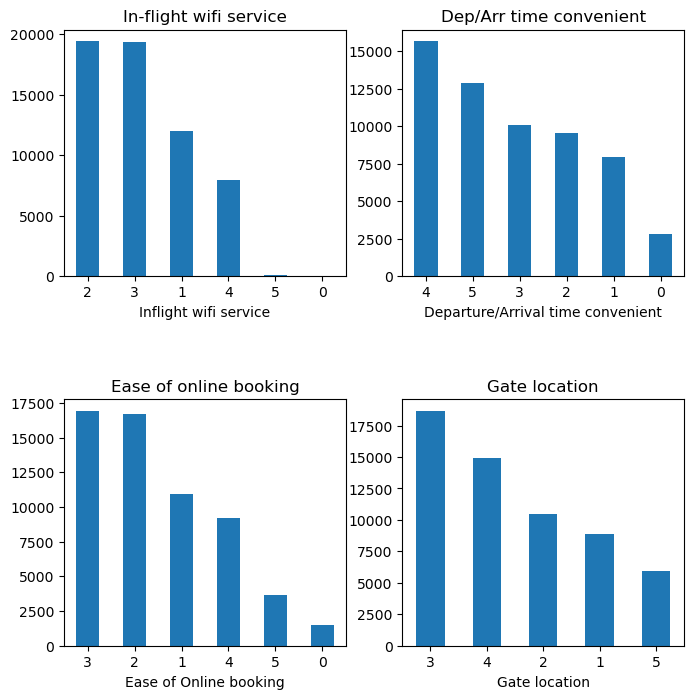

In [91]:
dissatisfied = df_cleaned[df_cleaned['satisfaction'] == 0]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
dissatisfied['Inflight wifi service'].value_counts().plot(kind='bar', ax=axes[0, 0], title='In-flight wifi service')
dissatisfied['Departure/Arrival time convenient'].value_counts().plot(kind='bar', ax=axes[0, 1], title='Dep/Arr time convenient')
dissatisfied['Ease of Online booking'].value_counts().plot(kind='bar', ax=axes[1, 0], title='Ease of online booking')
dissatisfied['Gate location'].value_counts().plot(kind='bar', ax=axes[1, 1], title='Gate location')

for ax in axes.flatten():
    ax.tick_params(axis='x', labelrotation=0)
    
plt.subplots_adjust(hspace=0.5)
    
plt.show()

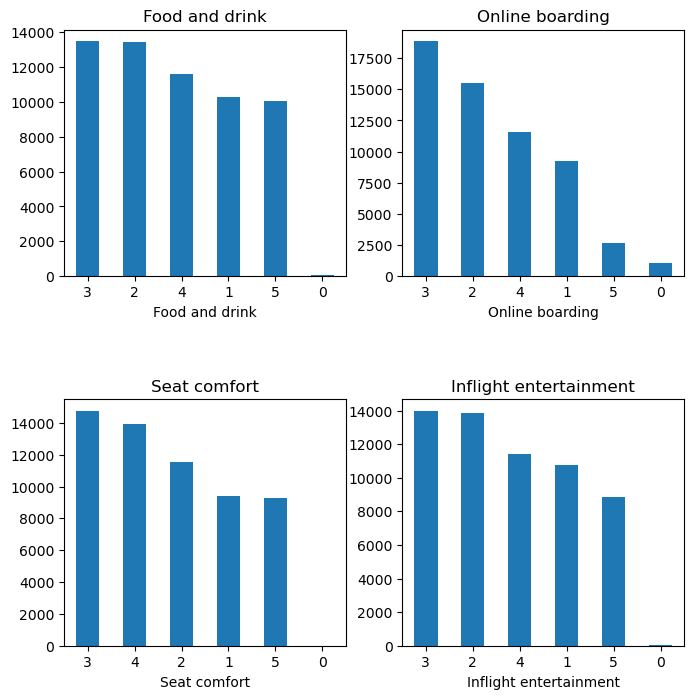

In [92]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
dissatisfied['Food and drink'].value_counts().plot(kind='bar', ax=axes[0, 0], title='Food and drink')
dissatisfied['Online boarding'].value_counts().plot(kind='bar', ax=axes[0, 1], title='Online boarding')
dissatisfied['Seat comfort'].value_counts().plot(kind='bar', ax=axes[1, 0], title='Seat comfort')
dissatisfied['Inflight entertainment'].value_counts().plot(kind='bar', ax=axes[1, 1], title='Inflight entertainment')

for ax in axes.flatten():
    ax.tick_params(axis='x', labelrotation=0)
    
plt.subplots_adjust(hspace=0.5)
    
plt.show()

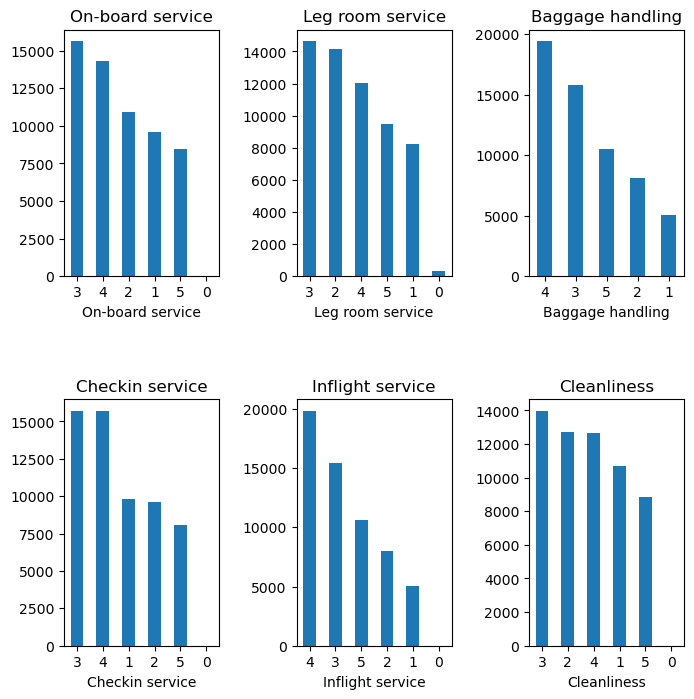

In [93]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 8))
dissatisfied['On-board service'].value_counts().plot(kind='bar', ax=axes[0, 0], title='On-board service')
dissatisfied['Leg room service'].value_counts().plot(kind='bar', ax=axes[0, 1], title='Leg room service')
dissatisfied['Baggage handling'].value_counts().plot(kind='bar', ax=axes[0, 2], title='Baggage handling')
dissatisfied['Checkin service'].value_counts().plot(kind='bar', ax=axes[1, 0], title='Checkin service')
dissatisfied['Inflight service'].value_counts().plot(kind='bar', ax=axes[1, 1], title='Inflight service')
dissatisfied['Cleanliness'].value_counts().plot(kind='bar', ax=axes[1, 2], title='Cleanliness')

for ax in axes.flatten():
    ax.tick_params(axis='x', labelrotation=0)
    
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.5)
    
plt.show()

In [110]:
df_cleaned = df_cleaned.drop(columns=['Distance Bucket'])

### 2.3 Test Data Preparation

##### Test Dataset Preparation and Cleaning Steps

The same steps will be performed to clean the **test** dataset

In [22]:
df1 = pd.read_csv('test.csv')
df1.shape

(25976, 25)

In [23]:
df1.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [24]:
df_cleaned_test=df1.drop(['Unnamed: 0','id'], axis=1)

In [25]:
df_cleaned_test = df_cleaned_test.drop('Arrival Delay in Minutes', axis=1)

In [26]:
df_cleaned_test.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
satisfaction                         0
dtype: int64

In [27]:
print(f"Duplicated rows: {df_cleaned_test.duplicated().sum()}")

Duplicated rows: 0


In [28]:
categorical_columns_1=[]
for col in df_cleaned_test.columns:
    if df_cleaned_test[col].dtype=='object':
        categorical_columns_1.append(col)
        print(f"Unique values of '{col}' is {df_cleaned_test[col].unique()}")

Unique values of 'Gender' is ['Female' 'Male']
Unique values of 'Customer Type' is ['Loyal Customer' 'disloyal Customer']
Unique values of 'Type of Travel' is ['Business travel' 'Personal Travel']
Unique values of 'Class' is ['Eco' 'Business' 'Eco Plus']
Unique values of 'satisfaction' is ['satisfied' 'neutral or dissatisfied']


In [29]:
label_encoders_1 = {}
for col in categorical_columns_1:
    label_encoders_1[col] = LabelEncoder()
    df_cleaned_test[f"{col}_label"] = label_encoders_1[col].fit_transform(df_cleaned_test[col])

In [30]:
for col in categorical_columns_1:
    df_group_1 = df_cleaned_test[[col, f"{col}_label"]].drop_duplicates()
    print(df_group_1)
    print()

   Gender  Gender_label
0  Female             0
2    Male             1

       Customer Type  Customer Type_label
0     Loyal Customer                    0
2  disloyal Customer                    1

     Type of Travel  Type of Travel_label
0   Business travel                     0
15  Personal Travel                     1

       Class  Class_label
0        Eco            1
1   Business            0
17  Eco Plus            2

              satisfaction  satisfaction_label
0                satisfied                   1
2  neutral or dissatisfied                   0



In [31]:
df_cleaned_test.drop(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], axis=1, inplace=True)
df_cleaned_test.rename(columns = {'Gender_label':'Gender', 'Customer Type_label':'Customer Type', 'Type of Travel_label':'Type of Travel'
                                     ,'Class_label':'Class', 'satisfaction_label':'satisfaction'}, inplace = True)

### Cleaned Test Dataset

In [32]:
df_cleaned_test.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Gender,Customer Type,Type of Travel,Class,satisfaction
0,52,160,5,4,3,4,3,4,3,5,...,5,2,5,5,50,0,0,0,1,1
1,36,2863,1,1,3,1,5,4,5,4,...,4,3,4,5,0,0,0,0,0,1
2,20,192,2,0,2,4,2,2,2,2,...,3,2,2,2,0,1,1,0,1,0
3,44,3377,0,0,0,2,3,4,4,1,...,1,3,1,4,0,1,0,0,0,1
4,49,1182,2,3,4,3,4,1,2,2,...,2,4,2,4,0,0,0,0,1,1


In [112]:
df_cleaned

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Gender,Customer Type,Type of Travel,Class,satisfaction
0,13,460,3,4,3,1,5,3,5,5,...,4,4,5,5,25,1,0,1,2,0
1,25,235,3,2,3,3,1,3,1,1,...,3,1,4,1,1,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,4,5,0,0,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,...,3,1,4,2,11,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,4,3,3,3,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,3,2,2,2,2,...,4,2,3,2,3,0,1,0,1,0
103900,49,2347,4,4,4,4,2,4,5,5,...,5,5,5,4,0,1,0,0,0,1
103901,30,1995,1,1,1,3,4,1,5,4,...,4,5,5,4,7,1,1,0,0,0
103902,22,1000,1,1,1,5,1,1,1,1,...,1,5,4,1,0,0,1,0,1,0


# 3. Decision Tree

In [113]:
# Separate features and target
X_train = df_cleaned.drop('satisfaction', axis=1)
y_train = df_cleaned['satisfaction']
X_test = df_cleaned_test.drop('satisfaction', axis=1)
y_test = df_cleaned_test['satisfaction']

class_labels = np.unique(y_train)
print(class_labels)

[0 1]


In [114]:
print(X_train.dtypes)

Age                                  int64
Flight Distance                      int64
Inflight wifi service                int64
Departure/Arrival time convenient    int64
Ease of Online booking               int64
Gate location                        int64
Food and drink                       int64
Online boarding                      int64
Seat comfort                         int64
Inflight entertainment               int64
On-board service                     int64
Leg room service                     int64
Baggage handling                     int64
Checkin service                      int64
Inflight service                     int64
Cleanliness                          int64
Departure Delay in Minutes           int64
Gender                               int32
Customer Type                        int32
Type of Travel                       int32
Class                                int32
dtype: object


In [115]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'max_depth': [5, 10, 20, None],
    'max_features': [None, 'sqrt', 'log2'],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform Randomized Search with cross-validation and stratification
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1, scoring='accuracy')
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)

Best parameters found:  {'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20, 'criterion': 'gini'}


In [116]:
# Train the model with the best parameters
best_clf = random_search.best_estimator_
best_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[14144   429]
 [  740 10663]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14573
           1       0.96      0.94      0.95     11403

    accuracy                           0.95     25976
   macro avg       0.96      0.95      0.95     25976
weighted avg       0.96      0.95      0.95     25976


Accuracy Score:
0.9549969202340622


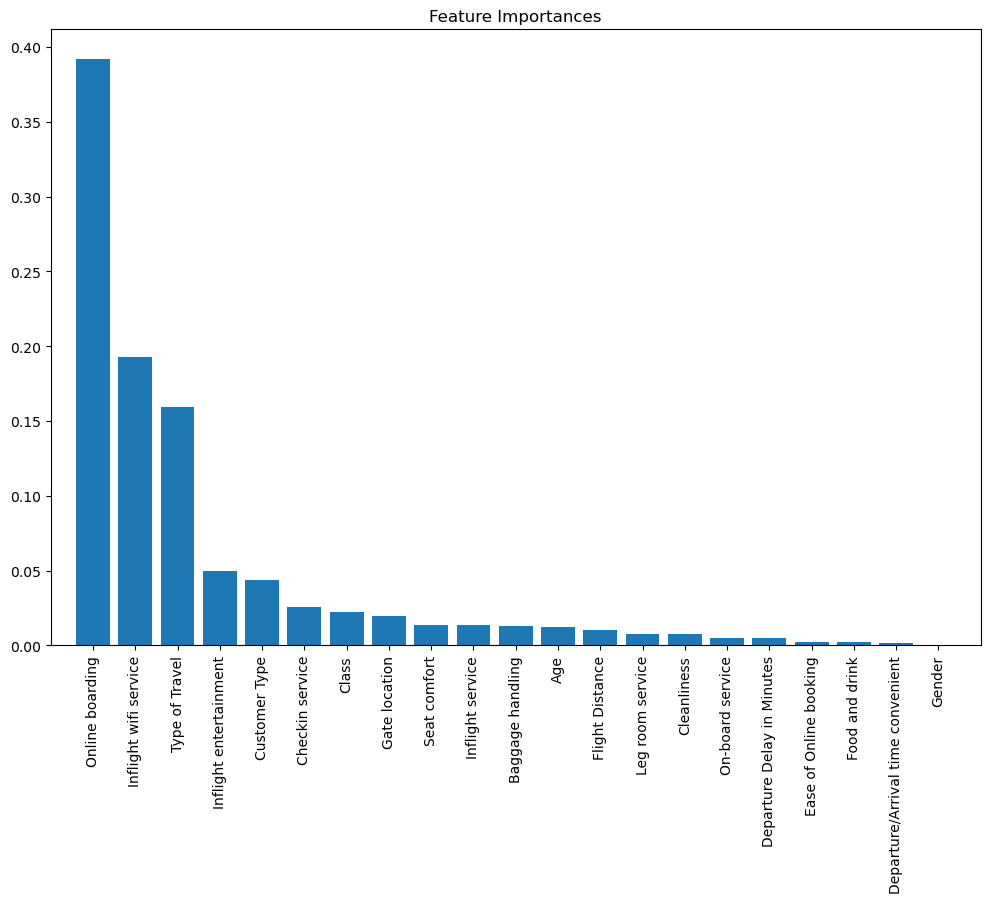

Feature Importances:
Online boarding: 0.39212842098667317
Inflight wifi service: 0.19247595913009982
Type of Travel: 0.1591156605404018
Inflight entertainment: 0.0494530246397129
Customer Type: 0.04393715437788739
Checkin service: 0.02581856190172227
Class: 0.02236925245120026
Gate location: 0.019764430079185758
Seat comfort: 0.013954446023733438
Inflight service: 0.013801412085354079
Baggage handling: 0.012657476806976603
Age: 0.01222261924295216
Flight Distance: 0.010556750624064953
Leg room service: 0.007909410817884413
Cleanliness: 0.007571084897273736
On-board service: 0.00492729042501267
Departure Delay in Minutes: 0.004792401692258382
Ease of Online booking: 0.002216780885075152
Food and drink: 0.0020648175442167563
Departure/Arrival time convenient: 0.0018242754470797233
Gender: 0.00043876940123452964


In [117]:
# Plot feature importances
importances = best_clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.show()

print("Feature Importances:")
for i in range(len(features)):
    print(f"{features[indices[i]]}: {importances[indices[i]]}")